In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import cross_val_score


In [4]:
dataSet = pd.read_csv('cleaned_all_phones.csv')
dataSet.head()

,phone_name,brand,os,inches,resolution,battery,battery_type,ram(GB),announcement_date,weight(g),...,video_1080p,video_4K,video_8K,video_30fps,video_60fps,video_120fps,video_240fps,video_480fps,video_960fps,price(USD)
0,Y6II Compact,Huawei,Android 5.1,5.0,720x1280,2200,Li-Po,2,2016-09-01,140.0,...,False,False,False,True,False,False,False,False,False,120.0
1,K20 plus,LG,Android 7.0,5.3,720x1280,2700,Li-Ion,2,2016-12-01,140.0,...,True,False,False,True,False,False,False,False,False,100.0
2,P8 Lite (2017),Huawei,Android 7.0,5.2,1080x1920,3000,Li-Ion,4,2017-01-01,147.0,...,True,False,False,True,False,False,False,False,False,420.0
3,Redmi Note 4,Xiaomi,Android 6.0,5.5,1080x1920,4100,Li-Po,4,2017-01-01,165.0,...,True,False,False,True,False,True,False,False,False,150.0
4,P10,Huawei,Android 7.0,5.1,1080x1920,3200,Li-Ion,4,2017-02-01,145.0,...,True,True,False,True,True,False,False,False,False,420.0


In [5]:
dataSet.info()
#This data set has only only 3 integer data type attributes
plt.scatter(X_test[['ram(GB)']], y_test, color ='blue', label = "Actual")
plt.xlabel('ram(GB)')
plt.ylabel('actual price')
plt.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1512 entries, 0 to 1511
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   phone_name         1512 non-null   object 
 1   brand              1512 non-null   object 
 2   os                 1512 non-null   object 
 3   inches             1512 non-null   float64
 4   resolution         1512 non-null   object 
 5   battery            1512 non-null   int64  
 6   battery_type       1512 non-null   object 
 7   ram(GB)            1512 non-null   int64  
 8   announcement_date  1512 non-null   object 
 9   weight(g)          1512 non-null   float64
 10  storage(GB)        1512 non-null   int64  
 11  video_720p         1512 non-null   bool   
 12  video_1080p        1512 non-null   bool   
 13  video_4K           1512 non-null   bool   
 14  video_8K           1512 non-null   bool   
 15  video_30fps        1512 non-null   bool   
 16  video_60fps        1512 

NameError: name 'X_test' is not defined

# Model Creation

In [6]:

#dropping all non numeric columns for simplicity 
dataSet_numeric = dataSet.select_dtypes(include = ['float64', 'int64', 'bool'])
#features
X = dataSet_numeric.drop('price(USD)', axis = 1)
#target
y = dataSet_numeric['price(USD)']

X_train, X_test , y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Linear Regression

In [7]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)
#make the predictions
y_pred = model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 55804.65985376614
R-squared: 0.20699718127109612


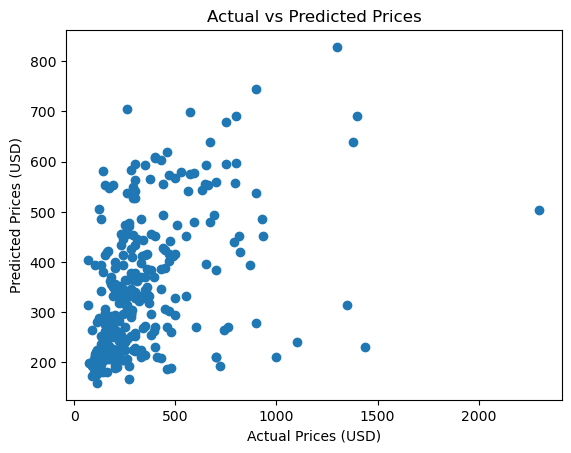

In [8]:
import matplotlib.pyplot as plt

# Scatter plot of actual vs predicted prices
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Prices (USD)')
plt.ylabel('Predicted Prices (USD)')
plt.title('Actual vs Predicted Prices')
plt.show()

# # Residual plot
# residuals = y_test - y_pred
# plt.scatter(y_test, residuals)
# plt.axhline(y=0, color='r', linestyle='--')
# plt.xlabel('Actual Prices (USD)')
# plt.ylabel('Residuals')
# plt.title('Residual Plot')
# plt.show()


# Logistical Regression

In [9]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
#one hot encode price 
#defined threshold
average = round(dataSet['price(USD)'].mean())
threshold = average #338

dataSet_numeric['threshold_price'] = (dataSet_numeric['price(USD)'] > threshold).astype(int)


X = dataSet_numeric.drop(['price(USD)', 'threshold_price'], axis=1)

y = dataSet_numeric['threshold_price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)
pred = log_reg.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, pred)
print(f'Accuracy: {accuracy}')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, pred)
print("Confusion Matrix:\n", conf_matrix)

# Additional evaluation metrics
print(classification_report(y_test, pred))



Accuracy: 0.7425742574257426
Confusion Matrix:
 [[175  26]
 [ 52  50]]
              precision    recall  f1-score   support

           0       0.77      0.87      0.82       201
           1       0.66      0.49      0.56       102

    accuracy                           0.74       303
   macro avg       0.71      0.68      0.69       303
weighted avg       0.73      0.74      0.73       303



Logistical regression models require a binary target variable which Price(USD) is not, it is continous.  
Therefore I created a new column called threshold value that is a binary target that classifies the prices on whether or not they are above the average or below.  I created my logistical model based on that. 
